# The Music of Life: Exploring Spotify Music Datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

In [2]:
# Store filepath in a variable
data = "Resources/data.csv"
data_by_artist = "Resources/data_by_artist.csv"
data_by_genres = "Resources/data_by_genres.csv"
data_by_year = "Resources/data_by_year.csv"
data_w_genres = "Resources/data_w_genres.csv"

In [3]:
data_df = pd.read_csv(data, encoding="ISO-8859-1")
data_by_artist_df = pd.read_csv(data_by_artist, encoding="ISO-8859-1")
data_by_genres_df = pd.read_csv(data_by_genres, encoding="ISO-8859-1")
data_by_year_df = pd.read_csv(data_by_year, encoding="ISO-8859-1")
data_w_genres_df = pd.read_csv(data_w_genres, encoding="ISO-8859-1")
data_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


# 1a. Merging datasets and cleaning the data before exploration

In [4]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [5]:
#Clean artist names to allow for dataframe merge

data_df["artists"] = data_df["artists"].str.strip("[")
data_df["artists"] = data_df["artists"].str.strip("]")
data_df["artists"]

artists = tidy_split(data_df,"artists",sep=', ',keep=True)
artists["artists"] = artists["artists"].str.strip("'")
artists["artists"] = artists["artists"].str.strip('"')

In [6]:
merge_df = pd.merge(artists, data_w_genres_df, on="artists", how="outer")

In [7]:
merge_df.columns

Index(['acousticness_x', 'artists', 'danceability_x', 'duration_ms_x',
       'energy_x', 'explicit', 'id', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'name', 'popularity_x',
       'release_date', 'speechiness_x', 'tempo_x', 'valence_x', 'year',
       'acousticness_y', 'danceability_y', 'duration_ms_y', 'energy_y',
       'instrumentalness_y', 'liveness_y', 'loudness_y', 'speechiness_y',
       'tempo_y', 'valence_y', 'popularity_y', 'key_y', 'mode_y', 'count',
       'genres'],
      dtype='object')

In [8]:
reordered_merge_df = merge_df[["artists", "year", "release_date", "genres", "name", "id", "popularity_x", "popularity_y", "danceability_x", "danceability_y", "tempo_x", "tempo_y", "energy_x", "energy_y", "acousticness_x", "acousticness_y", "duration_ms_x", "duration_ms_y", "explicit", "instrumentalness_x", "instrumentalness_y", "key_x", "key_y", "liveness_x", "liveness_y", "loudness_x", "loudness_y", "speechiness_x", "speechiness_y", "valence_x", "valence_y"]]


In [9]:
#Rename columns for readability, and determine which columns to use later

renamed_merge_df = reordered_merge_df.rename(columns={"popularity_x": "Popularity of Song",
                                        "popularity_y": "Avg Popularity of Artist",
                                        "danceability_x": "Danceability of Song",
                                        "danceability_y": "Avg Danceability of Artist",
                                        "tempo_x": "Tempo of Song",
                                        "tempo_y": "Avg Tempo of Artist",
                                        "energy_x": "Energy of Song",
                                        "energy_y": "Avg Energy of Artist",
                                        "acousticness_x": "Acousticness of Song", 
                                        "acousticness_y": "Avg Acousticness of Artist",
                                        "duration_ms_x": "Duration of Song",
                                        "duration_ms_y": "Avg Duration of Artist",
                                        "danceability_x": "Danceability of Song",
                                        "danceability_y": "Avg Danceability of Artist",
                                        "tempo_x": "Tempo of Song",
                                        "tempo_y": "Avg Tempo of Artist",
                                        "instrumentalness_x": "Instrumentalness of Song",
                                        "instrumentalness_y": "Instrumentalness of Artist",
                                        "key_x": "Key of Song",
                                        "key_y": "Avg Key of Artist",
                                        "loudness_x": "Loudness of Song",
                                        "loudness_y": "Avg Loudness of Artist",
                                        "speechiness_x": "Speechiness of Song",
                                        "speechiness_y": "Avg Speechiness of Artist",
                                        "valence_x": "Valence of Song",
                                        "valence_y": "Avg Valence of Artist",
                                        "liveness_x": "Liveness of Song",
                                        "liveness_y": "Avg Liveness of Artist",
                                       })

In [10]:
#Clean genre names

renamed_merge_df["genres"].replace('\'','', regex=True, inplace=True)
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.strip("[")
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.strip("]")

In [11]:
#Further clean genre names

new_artists = tidy_split(renamed_merge_df,"genres",sep=', ',keep=False)
renamed_merge_df["genres"] = renamed_merge_df["genres"].str.lstrip()

In [12]:
#Count number of genres

this = new_artists["genres"].unique().tolist()
len(this)

3232

In [13]:
#Include only the columns we will be working with

smaller_artists = new_artists[["artists", "year", "genres", "name", "id", "Popularity of Song", "Avg Popularity of Artist", "Danceability of Song", "Valence of Song", "Loudness of Song", "Instrumentalness of Song", "Acousticness of Song"]].copy()
smaller_artists

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,traditional blues,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,traditional blues,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.1875,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273323,"Victor Yturbe ""El Piruli""",NaN,ranchera,NaN,NaN,NaN,34.2000,NaN,NaN,NaN,NaN,NaN
273324,"Weiss, George D.",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273325,"Yessister, Jazzsister",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273326,\,NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN


In [14]:
#Sort genres into parent categories

smaller_artists.loc[smaller_artists['genres'].str.contains('folk', case=False), 'genres'] = 'Folk'
smaller_artists.loc[smaller_artists['genres'].str.contains('country', case=False), 'genres'] = 'Country'
smaller_artists.loc[smaller_artists['genres'].str.contains('rap', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('rock', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('pop', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('classical', case=False), 'genres'] = 'Classical'
smaller_artists.loc[smaller_artists['genres'].str.contains('jazz', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('blues', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('adult standards', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('hip hop', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('mellow gold', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('funk', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('bop', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('lounge', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('big band', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('orchestra', case=False), 'genres'] = 'Classical'
smaller_artists.loc[smaller_artists['genres'].str.contains('motown', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('swing', case=False), 'genres'] = 'Jazz'
smaller_artists.loc[smaller_artists['genres'].str.contains('quiet storm', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('permanent wave', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('easy listening', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('singer-songwriter', case=False), 'genres'] = 'Folk'
smaller_artists.loc[smaller_artists['genres'].str.contains('urban contemporary', case=False), 'genres'] = 'Hip-Hop'
smaller_artists.loc[smaller_artists['genres'].str.contains('soul', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('disco', case=False), 'genres'] = 'Pop'
smaller_artists.loc[smaller_artists['genres'].str.contains('r&b', case=False), 'genres'] = 'R&B'
smaller_artists.loc[smaller_artists['genres'].str.contains('metal', case=False), 'genres'] = 'Rock'
smaller_artists.loc[smaller_artists['genres'].str.contains('latin', case=False), 'genres'] = 'R&B'
smaller_artists

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.1875,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.1875,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.1875,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273323,"Victor Yturbe ""El Piruli""",NaN,ranchera,NaN,NaN,NaN,34.2000,NaN,NaN,NaN,NaN,NaN
273324,"Weiss, George D.",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273325,"Yessister, Jazzsister",NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN
273326,\,NaN,,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN


In [15]:
#Count the number of each genre before further data cleaning

smaller_artists.value_counts("genres").head(8)

genres
Rock         192674
Jazz         105950
Pop           91906
R&B           62540
Classical     61064
Hip-Hop       60158
              46306
Folk          36773
dtype: int64

In [16]:
#Remove instances where genre and id occur twice

genres = ["Rock", "Jazz", "Pop", "R&B", "Classical", "Hip-Hop", "Folk", "Country"]
whatever_df = smaller_artists[~(smaller_artists[['genres','id']].duplicated(keep=False))]
                              
whatever_df

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,harlem renaissance,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,harlem renaissance,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,harlem renaissance,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273308,"Sergio Vega ""El Shaka""",NaN,banda,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,corrido,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,nuevo regional mexicano,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN
273308,"Sergio Vega ""El Shaka""",NaN,regional mexican,NaN,NaN,NaN,60.714286,NaN,NaN,NaN,NaN,NaN


In [17]:
#Only keep rows found in genre list

artists_by_genre = whatever_df.loc[whatever_df["genres"].isin(genres)]
artists_by_genre                                  

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920.0,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920.0,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920.0,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
3,Mamie Smith,1920.0,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4.0,3.187500,0.482,0.461,-12.619,0.000061,0.995
4,Mamie Smith,1920.0,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1.0,3.187500,0.574,0.764,-14.171,0.000492,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273182,SPiCYSOL,2020.0,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273182,SPiCYSOL,2020.0,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273198,Sfera Ebbasta,2021.0,Pop,Baby,2GIJ1Lw3ZoYUUYCABVjPcQ,1.0,1.000000,0.755,0.606,-1.957,0.001420,0.125
273221,"""Weird Al"" Yankovic",NaN,Rock,NaN,NaN,NaN,32.867925,NaN,NaN,NaN,NaN,NaN


In [18]:
#Take a look at the prevalence of each year in the dataset

artists_by_genre.value_counts("year").head(20)

year
1972.0    1733
1969.0    1638
1973.0    1602
1970.0    1541
1968.0    1528
1978.0    1524
1976.0    1523
1975.0    1520
1965.0    1497
1974.0    1493
1967.0    1476
1971.0    1464
1963.0    1440
1962.0    1403
1980.0    1373
1964.0    1368
1981.0    1342
1959.0    1301
1960.0    1290
1977.0    1289
dtype: int64

In [19]:
#remove ".0" from "year" values

artists_by_genre['year'] = artists_by_genre['year'].astype(str).apply(lambda x: x.split('.')[0])
artists_by_genre["year"].value_counts()

<ipython-input-19-31d32c35750f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_by_genre['year'] = artists_by_genre['year'].astype(str).apply(lambda x: x.split('.')[0])


1972    1733
1969    1638
1973    1602
1970    1541
1968    1528
        ... 
1925      50
1923      49
1924      36
1921      15
nan        2
Name: year, Length: 102, dtype: int64

In [20]:
#Display dataframe

artists_by_genre

,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist,Danceability of Song,Valence of Song,Loudness of Song,Instrumentalness of Song,Acousticness of Song
0,Mamie Smith,1920,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12.0,3.187500,0.598,0.634,-12.628,0.000522,0.991
1,Mamie Smith,1920,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4.0,3.187500,0.647,0.689,-12.098,0.000018,0.993
2,Mamie Smith,1920,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5.0,3.187500,0.782,0.487,-12.453,0.000002,0.992
3,Mamie Smith,1920,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4.0,3.187500,0.482,0.461,-12.619,0.000061,0.995
4,Mamie Smith,1920,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1.0,3.187500,0.574,0.764,-14.171,0.000492,0.992
...,...,...,...,...,...,...,...,...,...,...,...,...
273182,SPiCYSOL,2020,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273182,SPiCYSOL,2020,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12.0,12.000000,0.608,0.212,-8.539,0.000002,0.282
273198,Sfera Ebbasta,2021,Pop,Baby,2GIJ1Lw3ZoYUUYCABVjPcQ,1.0,1.000000,0.755,0.606,-1.957,0.001420,0.125
273221,"""Weird Al"" Yankovic",nan,Rock,NaN,NaN,NaN,32.867925,NaN,NaN,NaN,NaN,NaN


In [21]:
#Used Excel to manually remove two rows (Index #s 273221 and 273271 seen above) which were causing problems,
#then re-import CSV file

artists_by_genre2 = "Resources/artists_by_genre.csv"
artists_by_genre2 = pd.read_csv(artists_by_genre2, encoding="ISO-8859-1")
artists_by_genre2

,Unnamed: 0,artists,year,genres,name,id,Popularity of Song,Avg Popularity of Artist
0,0,Mamie Smith,1920,R&B,Keep A Song In Your Soul,0cS0A1fUEUd1EW3FcF8AEI,12,3.1875
1,1,Mamie Smith,1920,R&B,Golfing Papa,11m7laMUgmOKqI3oYzuhne,4,3.1875
2,2,Mamie Smith,1920,R&B,Don't You Advertise Your Man,5DlCyqLyX2AOVDTjjkDZ8x,5,3.1875
3,3,Mamie Smith,1920,R&B,Kansas City Man Blues - 78rpm Version,0lqEx4vktZP1y9hnwfF27Y,4,3.1875
4,4,Mamie Smith,1920,R&B,Miss Jenny's Ball (aka There'll Be No Freebies...,4HYmmG8uHL2hP4zSFWavKF,1,3.1875
...,...,...,...,...,...,...,...,...
86294,273169,ITZY,2020,Pop,WANNABE,6tCssnvTUREcperDOUTqvA,77,77.0000
86295,273174,Lil Xxel,2020,Pop,LMK,4s0hDz7zGgZUav9EvzyLsB,71,71.0000
86296,273182,SPiCYSOL,2020,Pop,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12,12.0000
86297,273182,SPiCYSOL,2020,R&B,10years vintage - LiVE from 2020.3.5 @EBISU LI...,1AL6lQa6NHNwOKTtVfMFga,12,12.0000


# 1b. Finding ways to explore the dataset by genre

In [22]:
#Confirm the number of years

years_chart = artists_by_genre2["year"].unique().tolist()
years_chart.sort()
len(years_chart)

101

In [23]:
#Glance at genre count

artists_by_genre2.groupby('year')['genres'].value_counts()

year  genres   
1920  Classical    26
      Rock         12
      R&B           9
      Pop           6
      Folk          1
                   ..
2021  Country      63
      Rock          7
      Jazz          3
      Classical     2
      Folk          2
Name: genres, Length: 770, dtype: int64

In [24]:
# Rearrange data frame so that 1. The columns become the genres 2. The index is sorted by year, and
# 3. The data is composed of the average "popularity" of each song in the given year / genre.

genres_by_year_rating = artists_by_genre2.groupby(["genres","year"])["Popularity of Song"].mean()

genre_ratings = genres_by_year_rating.unstack(level=0)
genre_ratings.columns = [x for x in genre_ratings.columns]
genre_ratings.head()

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
year,,,,,,,,
1920,2.846154,NaN,0.0,0.0,0.000000,0.166667,3.000000,0.75
1921,0.750000,NaN,1.0,0.0,0.000000,0.000000,NaN,NaN
1923,0.000000,7.0,NaN,NaN,5.944444,NaN,7.448276,NaN
1924,0.000000,NaN,NaN,NaN,0.040000,1.714286,0.500000,NaN
1925,2.666667,NaN,NaN,0.0,4.439024,3.000000,0.000000,NaN


In [25]:
#Convert "NaN"s to "0" and round number

clean_genre_ratings = genre_ratings.fillna(0).round(3)
clean_genre_ratings

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
year,,,,,,,,
1920,2.846,0.000,0.000,0.000,0.000,0.167,3.000,0.750
1921,0.750,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1923,0.000,7.000,0.000,0.000,5.944,0.000,7.448,0.000
1924,0.000,0.000,0.000,0.000,0.040,1.714,0.500,0.000
1925,2.667,0.000,0.000,0.000,4.439,3.000,0.000,0.000
...,...,...,...,...,...,...,...,...
2017,4.077,41.357,36.440,53.358,16.462,41.551,56.411,43.952
2018,11.500,39.616,22.000,56.744,19.067,40.601,53.766,26.397
2019,5.750,22.357,37.682,54.485,12.667,47.492,58.667,43.944


In [26]:
# Rearrange data frame so that 1. The columns become the year 2. The index is sorted by genre, and
# 3. The data is composed of the total number of recordings within each genre, sorted by year.
genres_by_year = artists_by_genre2.groupby(["year"])["genres"].value_counts()
genre_year_count = genres_by_year.unstack(level=0)
genre_year_count.columns = [x for x in genre_year_count.columns]
genre_year_count.head(8)

,1920,1921,1923,1924,1925,1926,1927,1928,1929,1930,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genres,,,,,,,,,,,,,,,,,,,,,
Classical,26.0,4.0,1.0,2.0,3.0,20.0,51.0,18.0,1.0,44.0,...,4.0,12.0,5.0,8.0,78.0,13.0,8.0,4.0,8.0,2.0
Country,NaN,NaN,1.0,NaN,NaN,NaN,47.0,36.0,18.0,40.0,...,89.0,23.0,26.0,36.0,33.0,42.0,73.0,84.0,32.0,63.0
Folk,1.0,3.0,NaN,NaN,NaN,33.0,2.0,30.0,1.0,42.0,...,84.0,80.0,89.0,230.0,104.0,25.0,48.0,22.0,40.0,2.0
Hip-Hop,1.0,1.0,NaN,NaN,2.0,NaN,NaN,9.0,13.0,1.0,...,73.0,72.0,58.0,74.0,89.0,53.0,90.0,101.0,163.0,174.0
Jazz,1.0,1.0,18.0,25.0,41.0,66.0,48.0,14.0,3.0,22.0,...,28.0,26.0,11.0,185.0,71.0,26.0,15.0,21.0,86.0,3.0
Pop,6.0,6.0,NaN,7.0,3.0,15.0,8.0,157.0,125.0,127.0,...,194.0,347.0,240.0,346.0,231.0,216.0,273.0,193.0,272.0,146.0
R&B,9.0,NaN,29.0,2.0,1.0,NaN,5.0,31.0,20.0,26.0,...,116.0,85.0,127.0,127.0,130.0,112.0,124.0,81.0,184.0,307.0
Rock,12.0,NaN,NaN,NaN,NaN,NaN,2.0,166.0,114.0,207.0,...,188.0,140.0,155.0,103.0,117.0,84.0,131.0,90.0,76.0,7.0


In [27]:
#Convert "NaN"s to "0"

clean_genre_year_count = genre_year_count.fillna(0).astype(int)
clean_genre_year_count

,1920,1921,1923,1924,1925,1926,1927,1928,1929,1930,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genres,,,,,,,,,,,,,,,,,,,,,
Classical,26,4,1,2,3,20,51,18,1,44,...,4,12,5,8,78,13,8,4,8,2
Country,0,0,1,0,0,0,47,36,18,40,...,89,23,26,36,33,42,73,84,32,63
Folk,1,3,0,0,0,33,2,30,1,42,...,84,80,89,230,104,25,48,22,40,2
Hip-Hop,1,1,0,0,2,0,0,9,13,1,...,73,72,58,74,89,53,90,101,163,174
Jazz,1,1,18,25,41,66,48,14,3,22,...,28,26,11,185,71,26,15,21,86,3
Pop,6,6,0,7,3,15,8,157,125,127,...,194,347,240,346,231,216,273,193,272,146
R&B,9,0,29,2,1,0,5,31,20,26,...,116,85,127,127,130,112,124,81,184,307
Rock,12,0,0,0,0,0,2,166,114,207,...,188,140,155,103,117,84,131,90,76,7


In [28]:
# Create variable for "year" for charts and graphs.

years = clean_genre_year_count.keys()

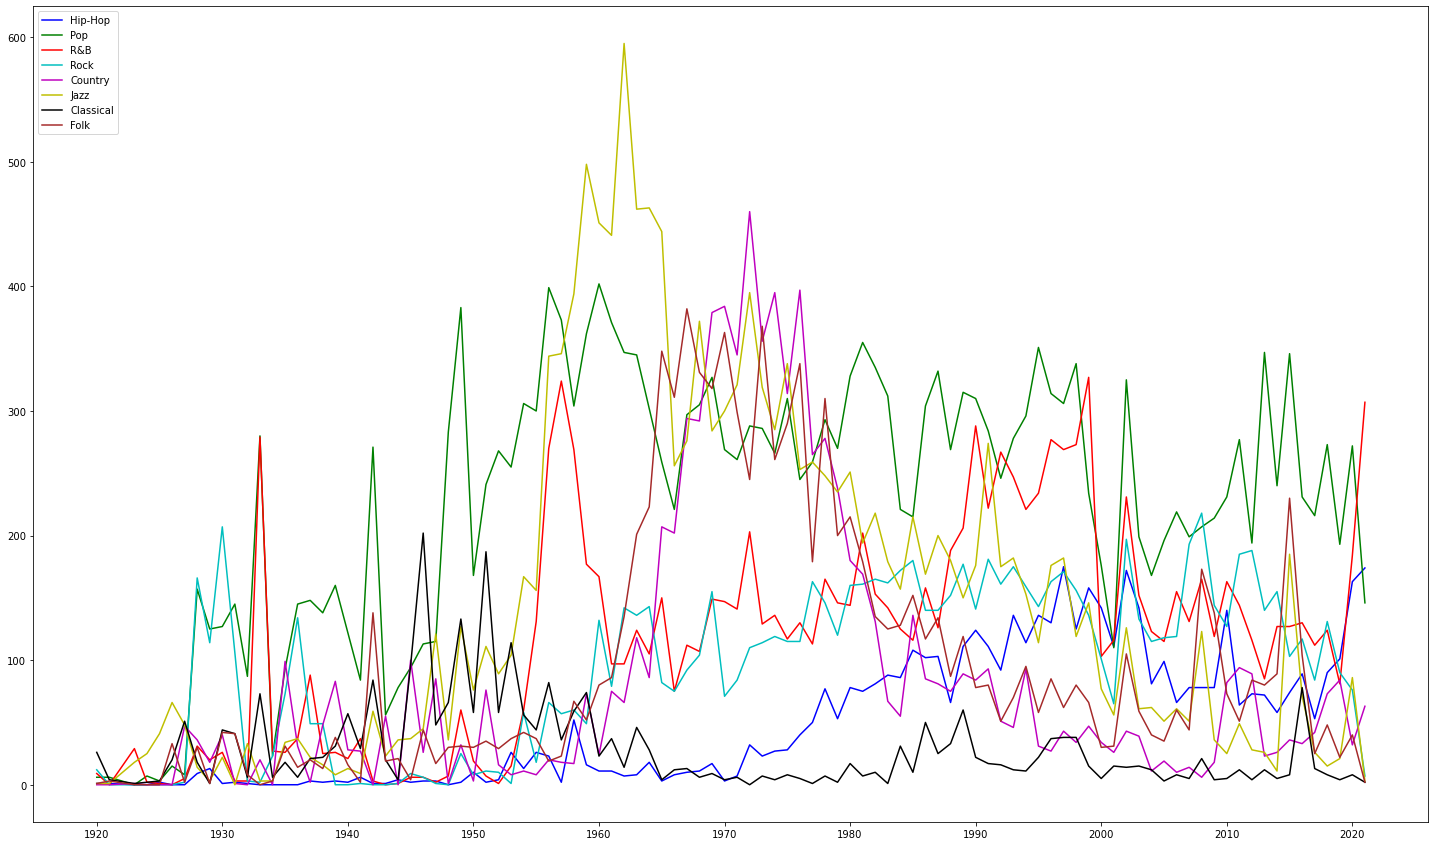

In [29]:
# Visualize the prevalence of recordings of each genre from the year 1920 to 2021. Note that the dataset only
# includes 1 month from the year 2021.

plt.figure(figsize = (25,15))
plt.xticks(range(1920,2021,10))

hip_hop, = plt.plot(years, clean_genre_year_count.loc['Hip-Hop',:], 
                        color="b", label="Hip-Hop")
pop, = plt.plot(years, clean_genre_year_count.loc['Pop',:], 
                        color="g", label="Pop")
r_b, = plt.plot(years, clean_genre_year_count.loc['R&B',:], 
                        color="r", label="R&B")
rock, = plt.plot(years, clean_genre_year_count.loc['Rock',:], 
                        color="c", label="Rock")
country, = plt.plot(years, clean_genre_year_count.loc['Country',:], 
                        color="m", label="Country")
jazz, = plt.plot(years, clean_genre_year_count.loc['Jazz',:], 
                        color="y", label="Jazz")
classical, = plt.plot(years, clean_genre_year_count.loc['Classical',:], 
                        color="k", label="Classical")
folk, = plt.plot(years, clean_genre_year_count.loc['Folk',:], 
                        color="brown", label="Folk")



plt.legend(loc="upper left")
plt.savefig("Resources/GenrePrevalence.png")
plt.show()

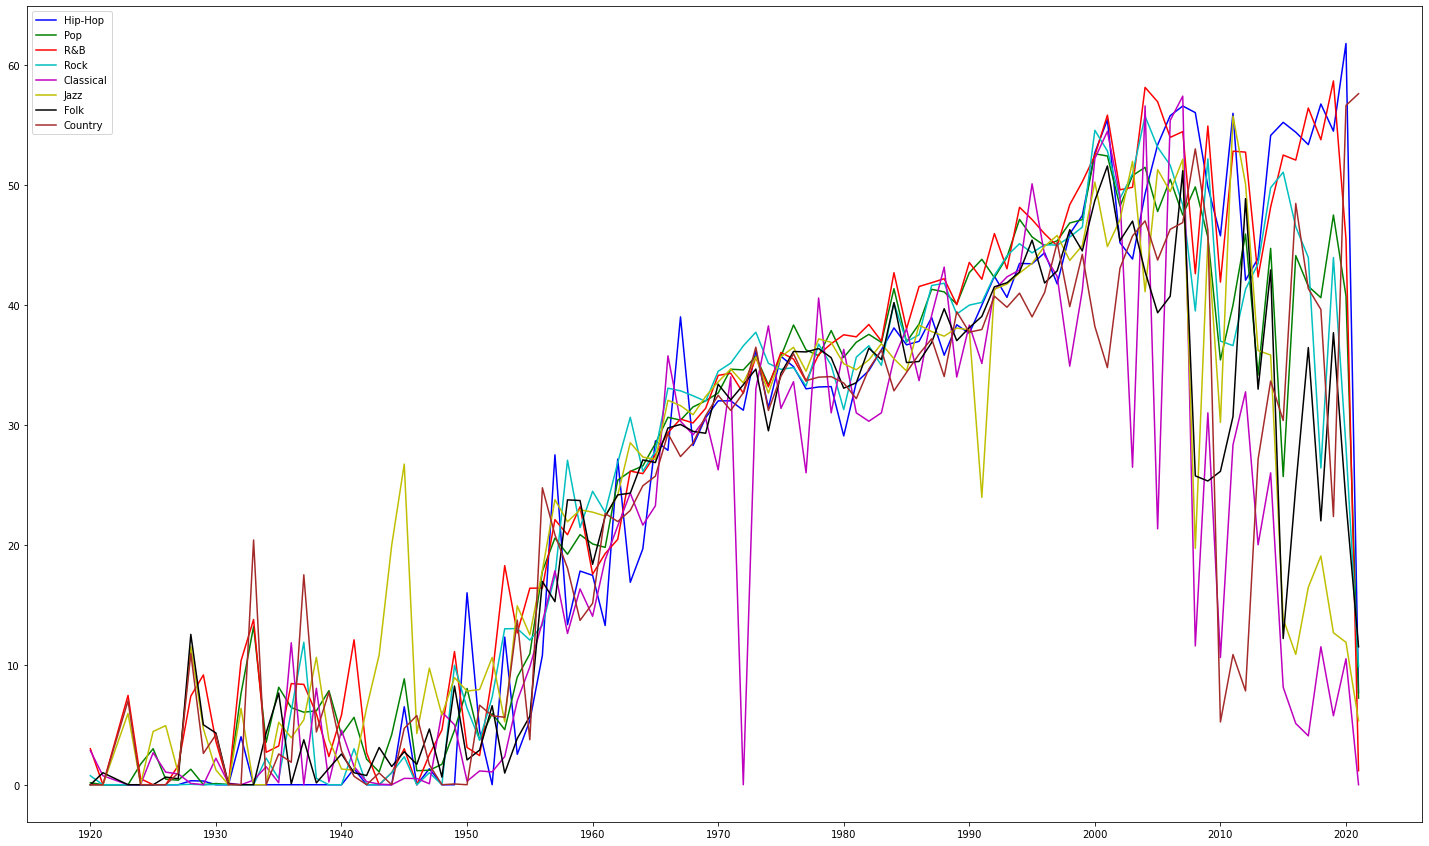

In [30]:
# Visualizing relative "popularity" of genres over time. This appears to be useless, possibly because the 
# selection of data from the original dataset was composed mostly of relatively popular songs despite the wide
# selection of genres and artists - note that each genre is in line with one another.


plt.figure(figsize = (25,15))
plt.xticks(range(1920,2021,10))

hip_hop, = plt.plot(years, clean_genre_ratings.loc[:, 'Hip-Hop'], 
                        color="b", label="Hip-Hop")
pop, = plt.plot(years, clean_genre_ratings.loc[:, 'Pop'], 
                        color="g", label="Pop")
r_b, = plt.plot(years, clean_genre_ratings.loc[:, 'R&B'], 
                        color="r", label="R&B")
rock, = plt.plot(years, clean_genre_ratings.loc[:, 'Rock'], 
                        color="c", label="Rock")
classical, = plt.plot(years, clean_genre_ratings.loc[:, 'Classical'], 
                        color="m", label="Classical")
jazz, = plt.plot(years, clean_genre_ratings.loc[:, 'Jazz'], 
                        color="y", label="Jazz")
folk, = plt.plot(years, clean_genre_ratings.loc[:, 'Folk'], 
                        color="k", label="Folk")
country, = plt.plot(years, clean_genre_ratings.loc[:, 'Country'], 
                        color="brown", label="Country")



plt.legend(loc="upper left")
plt.savefig("Resources/GenrePopularityOverTimehiphop.png")
plt.show()

In [31]:
# Organize artists by genre in order to determine the most popular artists within each genre.

genre_artist_rating = artists_by_genre2.groupby(["genres","artists"])["Popularity of Song"].mean()
artist_ratings = genre_artist_rating.unstack(level=0)
artist_ratings.columns = [x for x in artist_ratings.columns]
artist_ratings.head()

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
artists,,,,,,,,
((( O ))),NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN
070 Shake,NaN,NaN,NaN,62.000000,NaN,NaN,62.0,NaN
10 Ft. Ganja Plant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
10 Years,NaN,NaN,NaN,57.666667,NaN,NaN,NaN,NaN
"10,000 Maniacs",NaN,NaN,37.882353,NaN,NaN,37.882353,NaN,NaN


In [32]:
# A function to display the 20 most popular artists within a genre. I did not explore this further, but I did
# want to save the function for future exploration. This could easily be broken down by year or decade. In fact, it
# would probably be best to sort the artists by decade due to recency bias - most people are listening
# to music from recent years instead of older songs. The most popular artists by genre heavily skews towards
# contempory artists based on Spotify's metric of popularity.

artist_ratings.sort_values('Country', ascending=False).head(20)

,Classical,Country,Folk,Hip-Hop,Jazz,Pop,R&B,Rock
artists,,,,,,,,
J. Davi$,NaN,77.000000,NaN,NaN,NaN,NaN,NaN,NaN
Gabby Barrett,NaN,74.666667,NaN,NaN,NaN,NaN,NaN,NaN
Niko Moon,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN
Blanco Brown,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN
Luke Combs,NaN,69.041667,NaN,NaN,NaN,NaN,NaN,NaN
Priscilla Block,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN
Jordan Davis,NaN,68.833333,NaN,NaN,NaN,NaN,NaN,NaN
Roman Alexander,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN
Drew Green,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Obtain values of average "acousticness" by genre

genres_by_acousticness = artists_by_genre.groupby(["genres"])["Acousticness of Song"].mean()
genres_by_acousticness

genres
Classical    0.805361
Country      0.431053
Folk         0.441614
Hip-Hop      0.237198
Jazz         0.575745
Pop          0.509114
R&B          0.420278
Rock         0.403529
Name: Acousticness of Song, dtype: float64

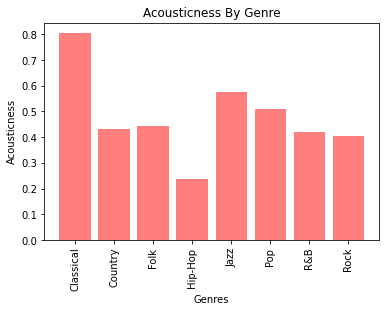

In [34]:
# Manually input values to build a bar chart for "acousticness" by genre.

genres_by_acousticness = artists_by_genre.groupby(["genres"])["Acousticness of Song"].mean()
genres = ["Classical", "Country", "Folk", "Hip-Hop", "Jazz", "Pop", "R&B", "Rock"]
acousticness = [0.805361, 0.431053, 0.441614, 0.237198, 0.575745, 0.509114, 0.420278, 0.403529]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, acousticness, color='r', alpha=0.5, align="center")
plt.title("Acousticness By Genre")
plt.xlabel("Genres")
plt.ylabel("Acousticness")
plt.savefig("Resources/GenreAcousticness.png")

In [35]:
# Obtain values of "instrumentalness" by genre.
genres_by_instrumentalness = artists_by_genre.groupby(["genres"])["Instrumentalness of Song"].mean()
genres_by_instrumentalness

genres
Classical    0.366660
Country      0.079335
Folk         0.090675
Hip-Hop      0.069285
Jazz         0.121906
Pop          0.134017
R&B          0.092798
Rock         0.095185
Name: Instrumentalness of Song, dtype: float64

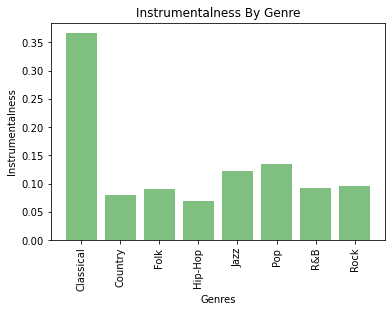

In [36]:
# Manually input values of "instrumentalness" by genre.

genres_by_instrumentalness = artists_by_genre.groupby(["genres"])["Instrumentalness of Song"].mean()
genres = ["Classical", "Country", "Folk", "Hip-Hop", "Jazz", "Pop", "R&B", "Rock"]
instrumentalness = [0.366660, 0.079335, 0.090675, 0.069285, 0.121906, 0.134017, 0.092798, 0.095185]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, instrumentalness, color='g', alpha=0.5, align="center")
plt.title("Instrumentalness By Genre")
plt.xlabel("Genres")
plt.ylabel("Instrumentalness")
plt.savefig("Resources/GenreInstrumentalness.png")

In [37]:
# Obtain values of "danceability" by genre since the year 1980. I am also mostly just saving a function to sort 
# through data by year.

genres_by_danceability2 = artists_by_genre[(artists_by_genre['year'] > '1979')].groupby(["genres"])["Loudness of Song"].mean()
genres_by_danceability2

genres
Classical   -14.132336
Country      -9.990237
Folk        -10.270065
Hip-Hop      -7.906925
Jazz        -10.950009
Pop          -9.055767
R&B          -8.248574
Rock         -9.152528
Name: Loudness of Song, dtype: float64

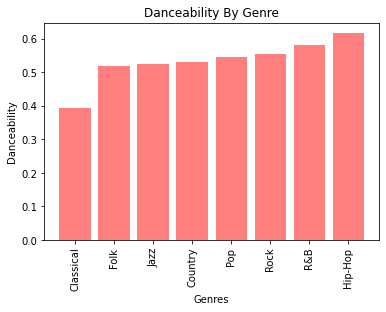

In [38]:
# Manually input values of "danceability" by genre to build bar chart.

genres_by_danceability = artists_by_genre.groupby(["genres"])["Danceability of Song"].mean()
genres = ["Classical", "Folk", "Jazz", "Country", "Pop", "Rock", "R&B", "Hip-Hop"]
danceability = [0.393659, 0.518735, 0.525007, 0.531633, 0.545774, 0.555276, 0.581127, 0.616933]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, danceability, color='r', alpha=0.5, align="center")
plt.title("Danceability By Genre")
plt.xlabel("Genres")
plt.ylabel("Danceability")
plt.savefig("Resources/GenreDanceability.png")

In [39]:
# Obtain values of "valence" by genre.

genres_by_valence = artists_by_genre.groupby(["genres"])["Valence of Song"].mean()
genres_by_valence

genres
Classical    0.346701
Country      0.607198
Folk         0.571278
Hip-Hop      0.537084
Jazz         0.553414
Pop          0.552669
R&B          0.571747
Rock         0.562616
Name: Valence of Song, dtype: float64

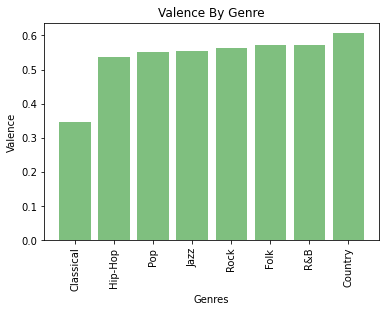

In [40]:
# Manually input values of "valence" by genre.

genres = ["Classical", "Hip-Hop", "Pop", "Jazz", "Rock", "Folk", "R&B", "Country"]
valence = [0.346701, 0.537084, 0.552669, 0.553414, 0.562616, 0.571278, 0.571747, 0.607198]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, valence, color='g', alpha=0.5, align="center")
plt.title("Valence By Genre")
plt.xlabel("Genres")
plt.ylabel("Valence")
plt.savefig("Resources/GenreValence.png")

In [41]:
# Obtain values of "loudness" by genre.

genres_by_loudness = artists_by_genre.groupby(["genres"])["Loudness of Song"].mean()
genres_by_valence

genres
Classical    0.346701
Country      0.607198
Folk         0.571278
Hip-Hop      0.537084
Jazz         0.553414
Pop          0.552669
R&B          0.571747
Rock         0.562616
Name: Valence of Song, dtype: float64

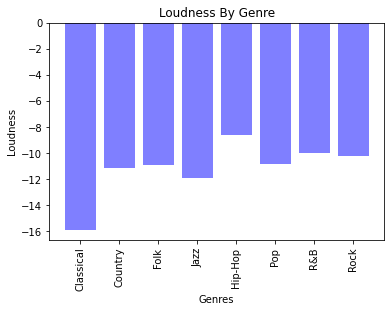

In [42]:
# Manually input values of "loudness" by genre.

genres = ["Classical", "Country", "Folk", "Jazz", "Hip-Hop", "Pop", "R&B", "Rock"]
loudness = [-15.880191, -11.127195, -10.903209, -11.919795, -8.618875, -10.859964, -10.022046, -10.264087]  
x_axis = np.arange(len(genres))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genres, rotation='vertical')
plt.bar(x_axis, loudness, color='b', alpha=0.5, align="center")
plt.title("Loudness By Genre")
plt.xlabel("Genres")
plt.ylabel("Loudness")
plt.savefig("Resources/GenreLoudness.png")

# 2. Exploring ways to measure music based on the various metric the dataset provided

In [43]:
list(data_df.columns.values)

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

__*The values of the song attributes we evaluated range from 0.0 to 1.0**__


**Acousticness**-
This value denotes the level of not having electrical amplification in a song. A score of 1.0 means the song is most likely to be an acoustic one, no electrical applification.
_____________
**Danceability**-
“Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

______________
**Instrumentalness**-
This value denotes the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is, no vocals.



In [44]:
# Isolate data related to attributes that we need to measure over time 
required_df = data_df[["year","liveness","acousticness", "instrumentalness", "danceability", "speechiness"]]
required_df

,year,liveness,acousticness,instrumentalness,danceability,speechiness
0,1920,0.3790,0.991000,0.000522,0.598,0.0936
1,1920,0.0809,0.643000,0.026400,0.852,0.0534
2,1920,0.5190,0.993000,0.000018,0.647,0.1740
3,1920,0.1280,0.000173,0.801000,0.730,0.0425
4,1920,0.4020,0.295000,0.000246,0.704,0.0768
...,...,...,...,...,...,...
174384,2020,0.1780,0.009170,0.000060,0.792,0.0356
174385,2021,0.1960,0.795000,0.000000,0.429,0.0360
174386,2020,0.1130,0.806000,0.920000,0.671,0.0282
174387,2021,0.1130,0.920000,0.000000,0.462,0.0377


In [45]:
# Large population, we limited our analysis to 1990 - 2020 
music_years = required_df.query("year>1989").query("year<2021")

music_years

,year,liveness,acousticness,instrumentalness,danceability,speechiness
9071,2008,0.149,0.39400,0.000000,0.484,0.0322
9081,2008,0.163,0.25500,0.000005,0.405,0.0289
9085,2008,0.122,0.40600,0.000000,0.477,0.0300
9087,2018,0.904,0.88700,0.000000,0.319,0.0623
9091,2018,0.683,0.93800,0.000005,0.269,0.0576
...,...,...,...,...,...,...
174380,2020,0.231,0.04840,0.000012,0.693,0.0762
174382,2020,0.253,0.14100,0.000000,0.544,0.2330
174384,2020,0.178,0.00917,0.000060,0.792,0.0356
174386,2020,0.113,0.80600,0.920000,0.671,0.0282


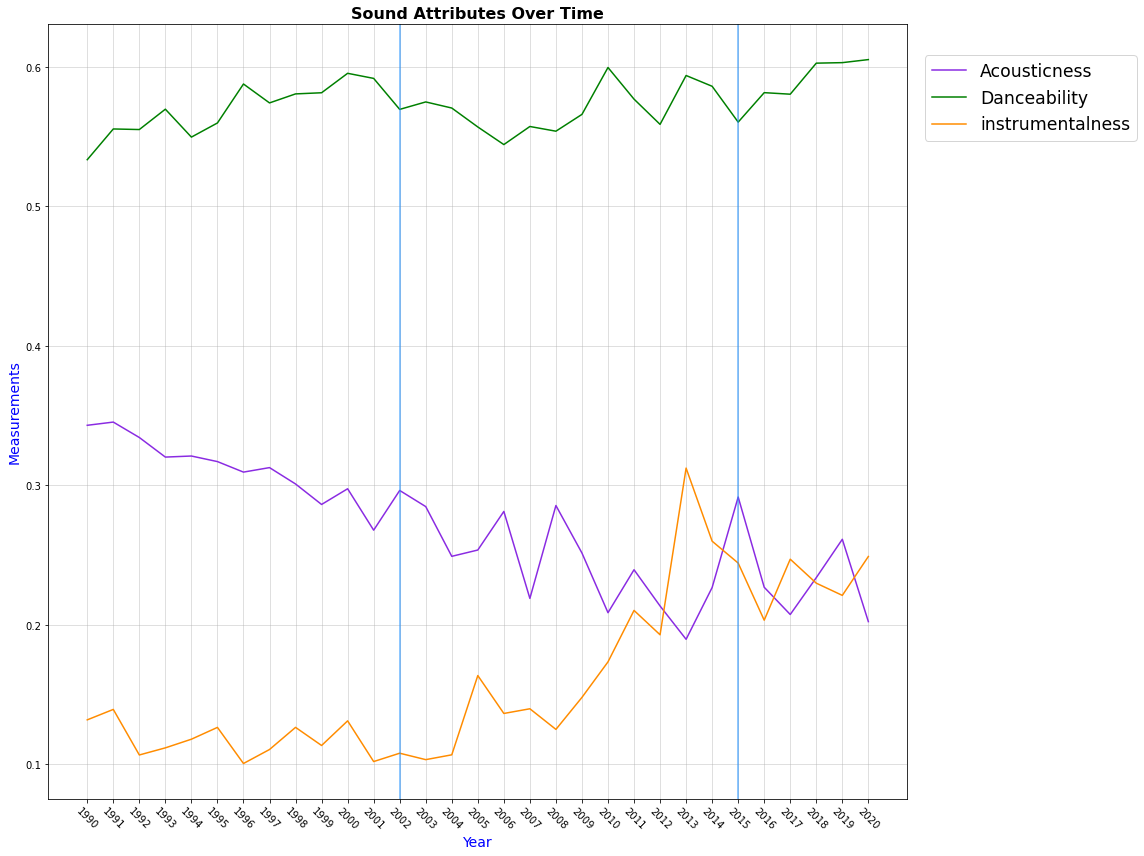

In [46]:
# group the selected attributes by year and calculate the mean
#x_axisl = music_years.groupby('year')['year'].max() <---ended up eliminating liveness
x_axisA = music_years.groupby('year')['year'].max()
x_axisd = music_years.groupby('year')['year'].max()
x_axisi = music_years.groupby('year')['year'].max()
#liveness = music_years.groupby('year')["liveness"].mean() <---ended up eliminating liveness
acousticness = music_years.groupby('year')["acousticness"].mean()
danceability = music_years.groupby('year')["danceability"].mean()
instrumentalness = music_years.groupby('year')["instrumentalness"].mean()

# Plot the line chart and label it
plt.figure(figsize = (16,12))
labels = ["Acousticness","Danceability","instrumentalness"]
#plt.plot(x_axisl, liveness)
plt.plot(x_axisA, acousticness, color = "blueviolet")
plt.plot(x_axisd, danceability, color = "green")
plt.plot(x_axisi, instrumentalness, color = "darkorange")
plt.xlabel("Year", color="blue", fontsize=14)
plt.ylabel("Measurements", color = "blue", fontsize = 14)
plt.grid(True,alpha=.5)
plt.xticks(range(1990,2021,1),rotation=-45)
plt.legend(labels=labels,fontsize="xx-large",loc=(1.02,0),bbox_to_anchor=(1.02,0.85))
plt.axvline(2002,linewidth=2, color='dodgerblue',alpha=.5)
plt.axvline(2015,linewidth=2, color='dodgerblue',alpha=.5)
plt.title("Sound Attributes Over Time",fontweight = "bold", fontsize = 16)

plt.savefig('.\\images\\Sound_Atributes_Over_Time.png',bbox_inches='tight')
plt.tight_layout()
plt.show()

In [47]:
#Convert duration in ms to minutes
duration_ms = data_df["duration_ms"]
duration_in_minutes = duration_ms/(1000*60)

#Add column showing duration in minutes
data_df["Duration in Minutes"] = data_df["duration_ms"]/(1000*60)
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Duration in Minutes
0,0.991000,'Mamie Smith',0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,2.805550
1,0.643000,"""Screamin' Jay Hawkins""",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,2.503333
2,0.993000,'Mamie Smith',0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,2.730450
3,0.000173,'Oscar Velazquez',0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,7.034783
4,0.295000,'Mixe',0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,2.753733


In [48]:
# Displaying Data from main data from for year, danceability, popularity, duration(minutes), and explicitness
dance_data = data_df.loc[:, ["year", "danceability", "popularity", "Duration in Minutes", "explicit", "tempo", "liveness"]]
dance_data.head()

,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
0,1920,0.598,12,2.805550,0,149.976,0.3790
1,1920,0.852,7,2.503333,0,86.889,0.0809
2,1920,0.647,4,2.730450,0,97.600,0.5190
3,1920,0.730,17,7.034783,0,127.997,0.1280
4,1920,0.704,2,2.753733,1,122.076,0.4020


In [49]:
# Retrieve the average danceability rating for every year
avg_by_year = dance_data.groupby(["year"]).mean()
avg_by_year.head()

,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
year,,,,,,
1920,0.515750,0.610315,3.968217,0.123209,113.226900,0.216049
1921,0.432171,0.391026,4.298196,0.070513,102.425397,0.205219
1922,0.575620,0.090909,2.335586,0.000000,100.033149,0.256662
1923,0.577341,5.205405,2.965706,0.000000,114.010730,0.227462
1924,0.549894,0.661017,3.184112,0.000000,120.689572,0.235219


In [50]:
#Find year with highest danceability
most_danceable = avg_by_year.sort_values(["danceability"], ascending=False).reset_index()
most_danceable.head()

,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
0,1927,0.655929,0.684000,2.942380,0.016000,112.663707,0.177387
1,2021,0.652488,7.750543,3.712667,0.107065,120.525875,0.162309
2,1929,0.647840,0.314406,2.813260,0.452156,110.926711,0.235977
3,1936,0.623378,2.663500,2.882977,0.000000,108.393047,0.213556
4,2020,0.605285,24.064741,3.649625,0.175361,124.058308,0.234415


In [51]:
last_thirty_years = most_danceable.query("year>1989").query("year<2021")

last_thirty_years

,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
4,2020,0.605285,24.064741,3.649625,0.175361,124.058308,0.234415
5,2019,0.603101,32.346930,3.757722,0.235294,122.419702,0.218501
6,2018,0.602731,27.599484,3.784552,0.240236,123.644288,0.231009
8,2010,0.599620,29.828149,4.452878,0.103519,123.327160,0.211265
10,2000,0.595451,46.259005,4.060830,0.159520,117.668198,0.216206
12,2013,0.593881,24.382532,4.745999,0.132342,124.159713,0.215043
13,2001,0.591808,50.873598,4.009997,0.180428,118.338902,0.191315
14,1996,0.587786,44.019792,4.192935,0.153389,117.972299,0.199873
15,2014,0.586153,29.107904,4.406541,0.148757,124.621497,0.222450
16,2016,0.581583,29.212431,4.300020,0.175394,123.814929,0.221417


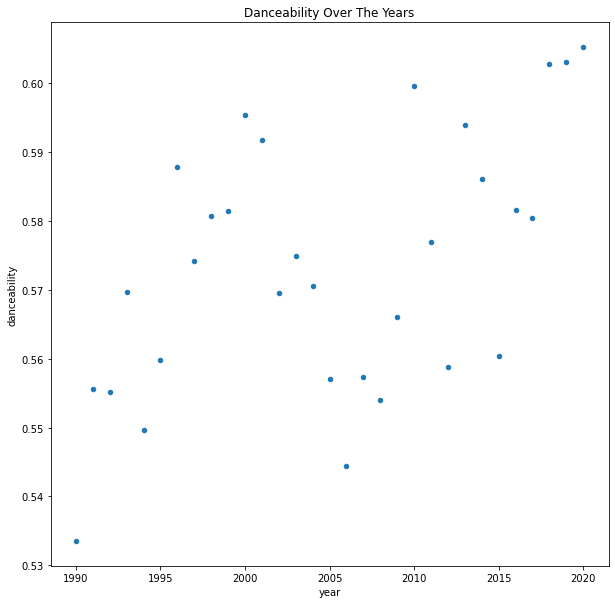

In [52]:
#Showing how danceable music has become over time
last_thirty_years.plot(kind="scatter", x="year", y="danceability", figsize=(10,10), title="Danceability Over The Years")
plt.show()

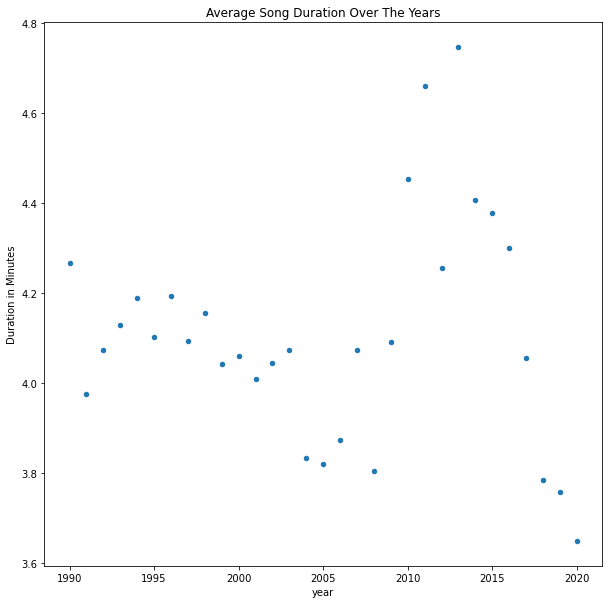

In [53]:
#Showing how the average length of songs have changed over time
last_thirty_years.plot(kind="scatter", x="year", y="Duration in Minutes", figsize=(10,10), title="Average Song Duration Over The Years")
plt.show()

# 3. Has Music Become More Explicit?

Based on the analysis of the data, the average number of explicit songs appears to be on the rise.  We can reasonably predict that the number of explicit songs will continue to rise in the future.  

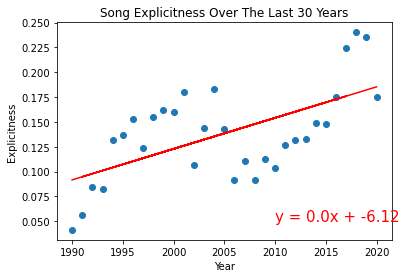

In [54]:
#Showing how explicit music has become over time
year = last_thirty_years["year"]
explicit = last_thirty_years["explicit"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(year, explicit)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(year, explicit)
plt.plot(year, regress_values, "r-")
plt.annotate(line_eq,(2010,0.050),fontsize=15,color="red")
plt.xlabel("Year")
plt.ylabel("Explicitness")
plt.title("Song Explicitness Over The Last 30 Years")
plt.show()

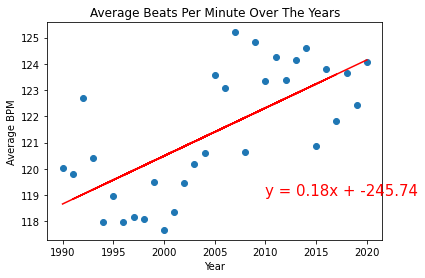

In [55]:
#Average Beats Per Minute For Music Over The Years
year = last_thirty_years["year"]
BPM = last_thirty_years["tempo"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(year, BPM)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(year, BPM)
plt.plot(year, regress_values, "r-")
plt.annotate(line_eq,(2010,119),fontsize=15,color="red")
plt.xlabel("Year")
plt.ylabel("Average BPM")
plt.title("Average Beats Per Minute Over The Years")
plt.show()

# 4. Playing Around With Visualizations

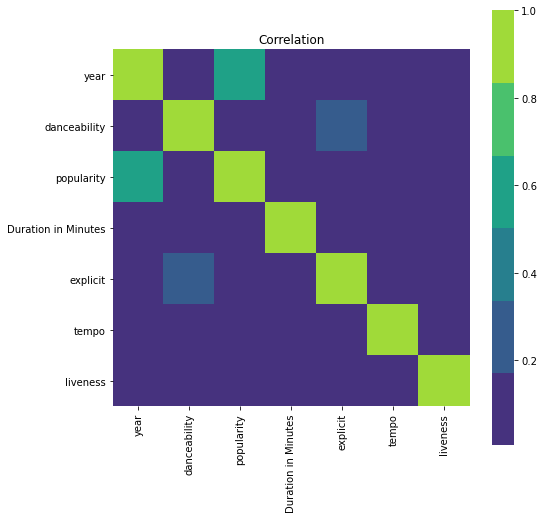

In [56]:
#Correlation between year, danceability, popularity, duration, etc.
corr = np.abs(dance_data.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("viridis")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation')
plt.show()

Text(0.5, 0, 'Year')

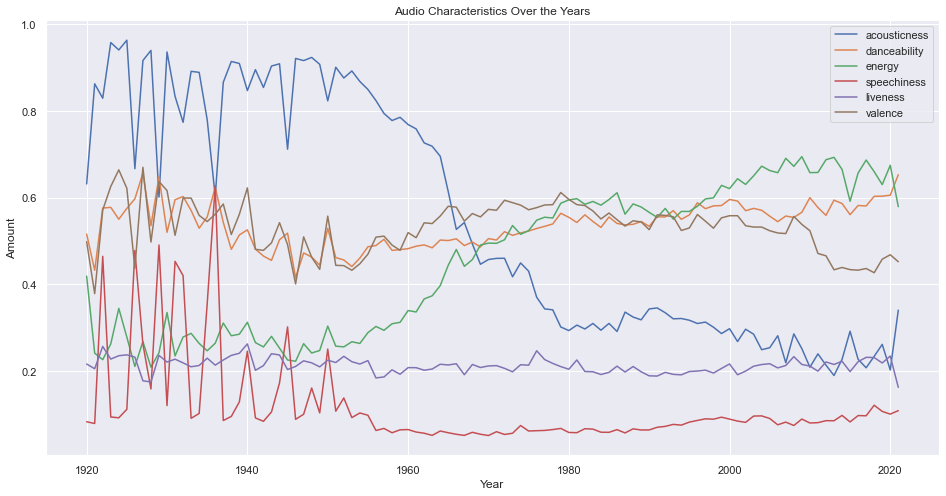

In [57]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio Characteristics Over the Years')
ax.set_ylabel('Amount')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

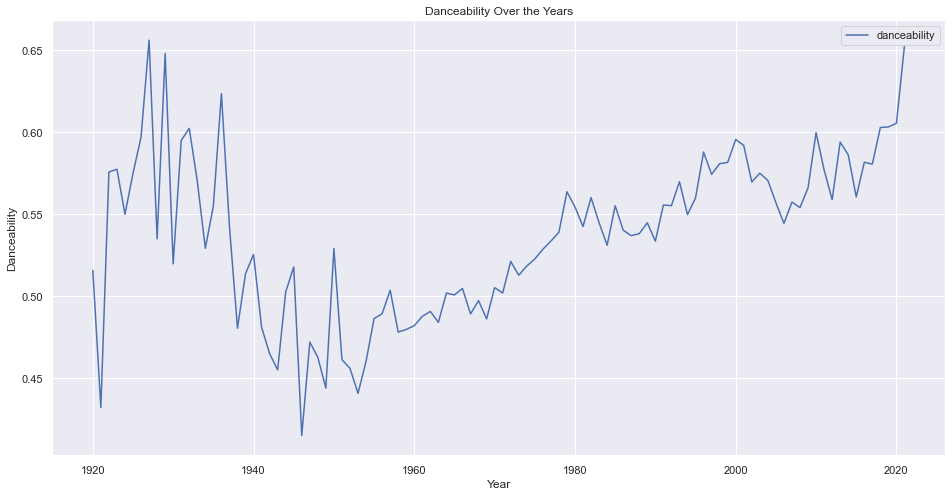

In [58]:
#Danceability visualization
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
columns = ["danceability"]
for col in columns:
    x = data_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Danceability Over the Years')
ax.set_ylabel('Danceability')
ax.set_xlabel('Year')

<Figure size 1152x576 with 0 Axes>

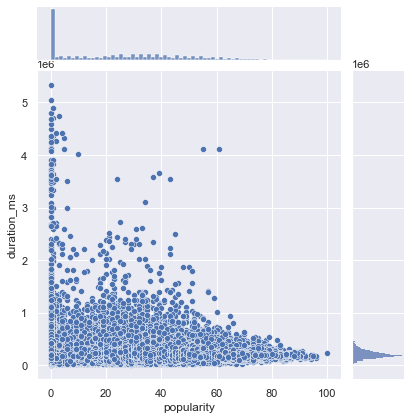

In [59]:
#Duration and popularity
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.jointplot(x=data_df.popularity,y=data_df["duration_ms"],data=data_df)


/Users/AndrewTheiss/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'positions'),
  Text(2, 0, 'Mood (feat. iann dior)'),
  Text(3, 0, 'WITHOUT YOU'),
  Text(4, 0, 'Whoopty'),
  Text(5, 0, 'LA NOCHE DE ANOCHE'),
  Text(6, 0, 'Therefore I Am'),
  Text(7, 0, '34+35'),
  Text(8, 0, 'What You Know Bout Love'),
  Text(9, 0, 'you broke me first')])

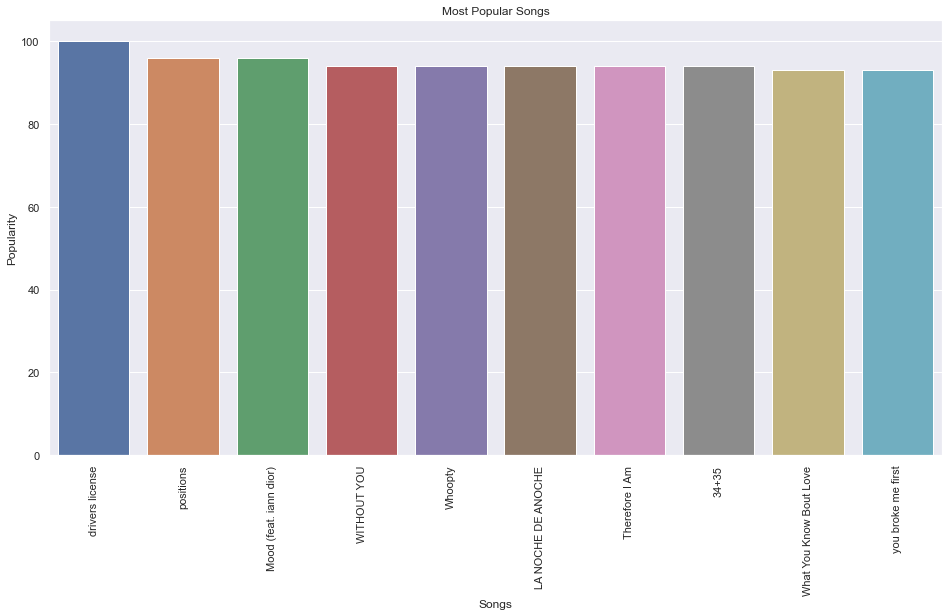

In [60]:
#Most popular songs
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
x = data_df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Most Popular Songs')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')
plt.xticks(rotation = 90)